importing the dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#laoding the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/Sample Data Set.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47623,43281,-0.696585,1.108944,1.413769,-0.127104,0.018555,-0.455078,0.587554,0.113729,-0.121544,...,-0.239606,-0.547457,0.045935,0.029361,-0.228841,0.108686,0.388269,0.173609,5.49,0.0
47624,43282,-0.282262,-1.212401,2.174897,-0.181501,-1.604027,-0.332694,-1.154018,0.223029,0.605392,...,-0.444623,-0.224011,0.728520,0.958983,-0.712869,0.908167,-0.054453,-0.107284,10.00,0.0
47625,43282,-1.513495,-0.206282,-0.702405,1.056423,1.058711,-0.708973,0.611571,0.249949,-0.844057,...,0.089904,0.723147,1.244035,-0.526450,-0.267320,-0.336504,0.398350,-0.017047,89.99,0.0
47626,43282,-0.659193,1.270953,0.946464,-0.370180,1.619207,-0.288297,1.588317,-0.492843,-0.829508,...,-0.060858,-0.028588,-0.704004,-0.971430,1.036058,-0.329102,-0.276970,-0.183521,0.99,0.0
47627,43282,1.121749,-0.208202,0.660816,0.857988,-0.823614,-0.422509,-0.286708,0.098616,0.541126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47628 entries, 0 to 47627
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47628 non-null  int64  
 1   V1      47628 non-null  float64
 2   V2      47628 non-null  float64
 3   V3      47628 non-null  float64
 4   V4      47628 non-null  float64
 5   V5      47628 non-null  float64
 6   V6      47628 non-null  float64
 7   V7      47628 non-null  float64
 8   V8      47628 non-null  float64
 9   V9      47628 non-null  float64
 10  V10     47628 non-null  float64
 11  V11     47628 non-null  float64
 12  V12     47628 non-null  float64
 13  V13     47628 non-null  float64
 14  V14     47628 non-null  float64
 15  V15     47628 non-null  float64
 16  V16     47628 non-null  float64
 17  V17     47627 non-null  float64
 18  V18     47627 non-null  float64
 19  V19     47627 non-null  float64
 20  V20     47627 non-null  float64
 21  V21     47627 non-null  float64
 22

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()




Class
0.0    47481
1.0      146
Name: count, dtype: int64

This Dataset is highly unbalanced
0--> Normal Transaction
1--> Fraudulent Transaction


In [ ]:
# separating the data for analysis
legit= credit_card_data[credit_card_data.Class == 0]
fraud= credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(47481, 31)
(146, 31)


In [ ]:
# statistical measures of data
legit.Amount.describe()

count    47481.000000
mean        91.749512
std        249.864438
min          0.000000
25%          7.600000
50%         24.990000
75%         83.000000
max      12910.930000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     146.000000
mean      100.769589
std       234.865142
min         0.000000
25%         1.000000
50%         8.370000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

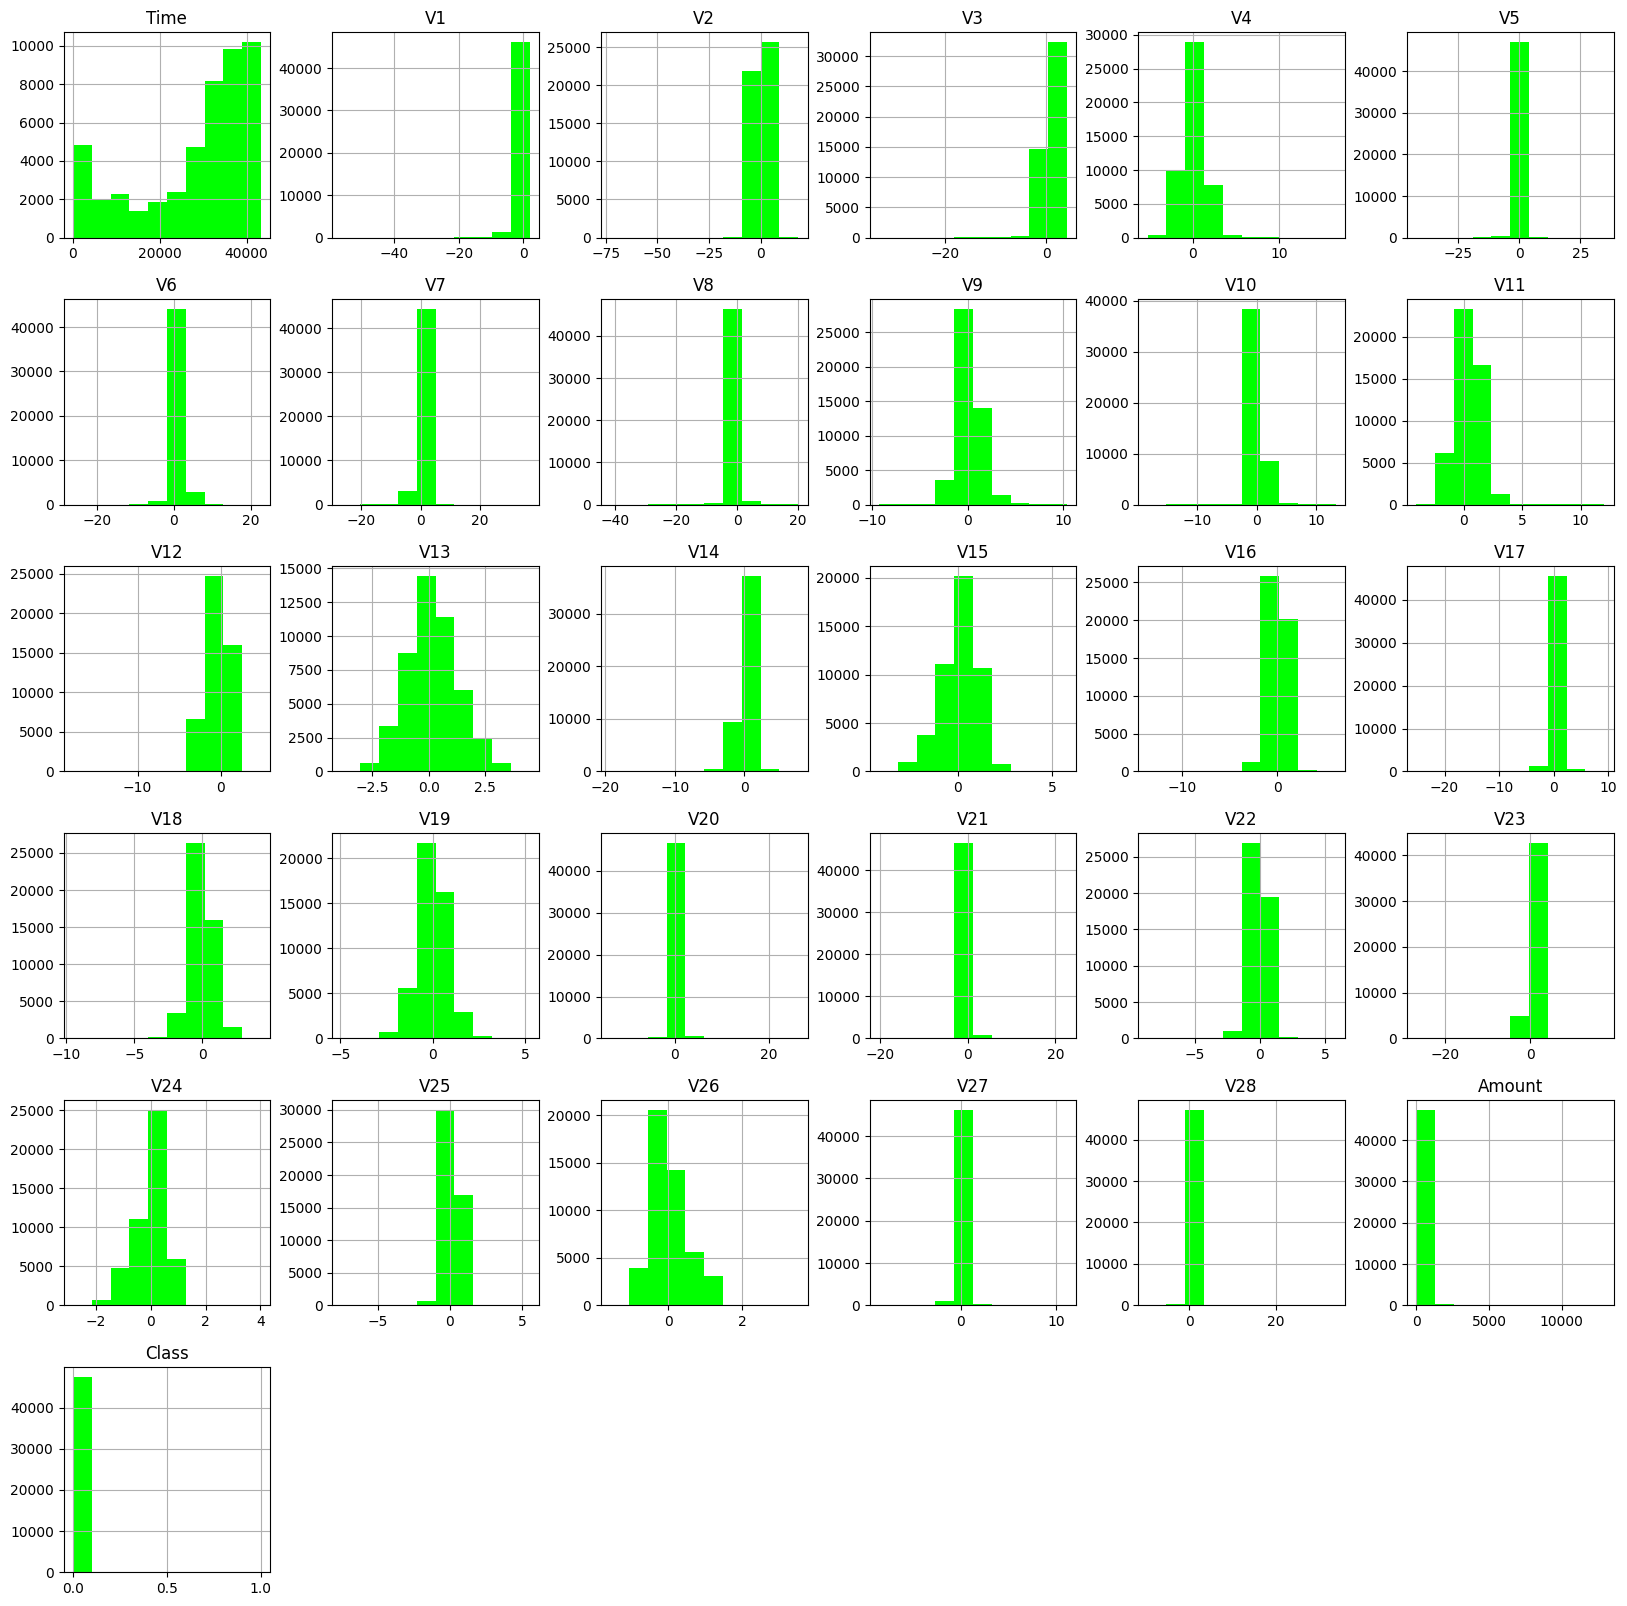

In [ ]:
credit_card_data.hist(figsize=(20,20),color='lime')
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

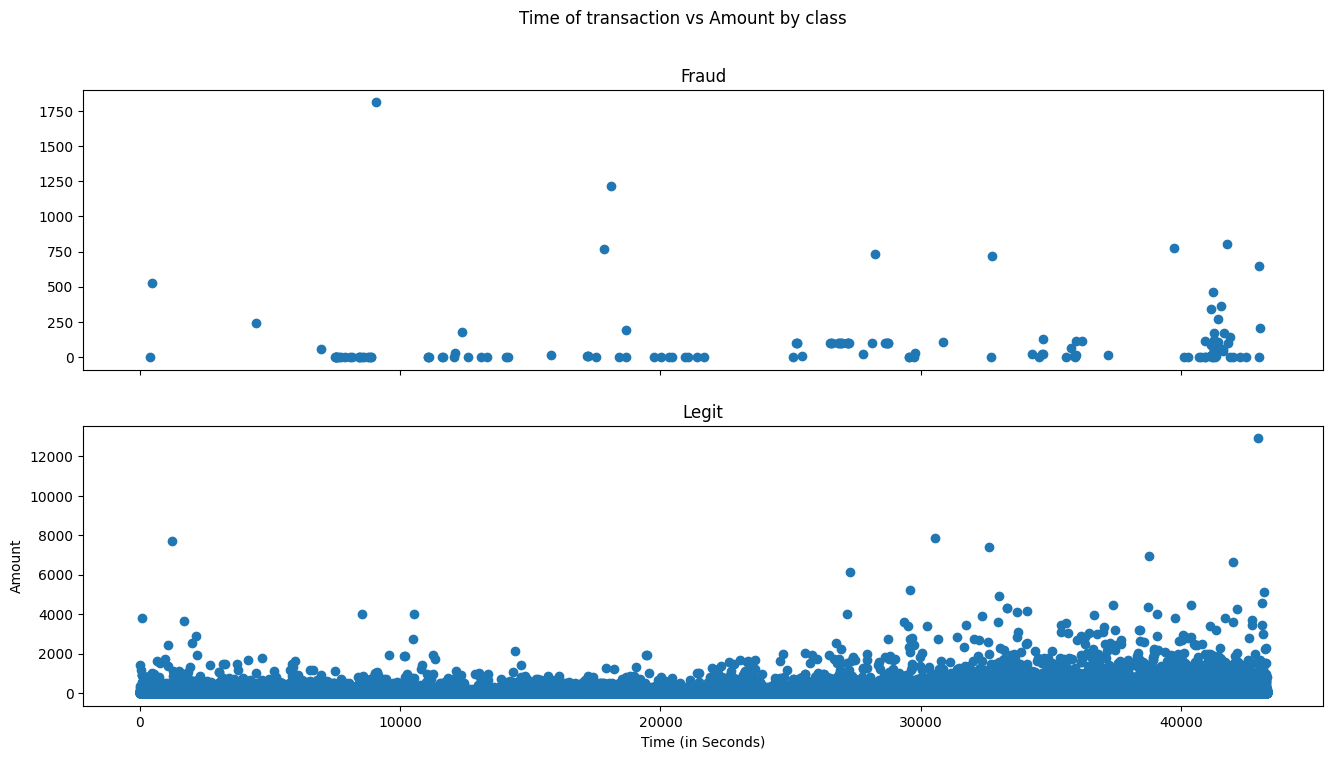

In [ ]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28187.518523,-0.217647,0.004622,0.729134,0.173144,-0.232960,0.109679,-0.095198,0.041927,0.152781,...,0.046262,-0.029852,-0.106718,-0.038640,0.008178,0.135952,0.022116,0.003026,0.003920,91.749512
1.0,26650.410959,-7.748350,5.502036,-10.507153,6.017631,-5.734345,-2.290523,-8.141188,3.800624,-3.626437,...,0.471417,0.881448,-0.228124,-0.286066,-0.085893,0.253943,0.167237,0.616539,0.037065,100.769589


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

Number of fraudulent transactions --> 383


In [ ]:
legit_sample = legit.sample(n=383)

Concatebating two DataFrames


In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14476,25640,0.984192,-0.649686,0.995271,0.357500,-1.288528,-0.467625,-0.500107,-0.026533,0.859099,...,0.149099,0.317361,-0.141001,0.484714,0.175585,1.095115,-0.057433,0.037284,131.60,0.0
1881,1448,1.099511,-0.714102,0.303979,-0.177317,-0.401431,0.835766,-0.692951,0.260083,0.779040,...,0.071236,0.089161,-0.344379,-1.293416,0.369670,1.187297,-0.062561,0.005582,112.50,0.0
5531,5613,-0.651571,1.777817,0.580497,1.481665,0.069720,-1.244331,0.418957,-0.003359,0.058996,...,-0.081694,-0.030180,-0.075498,0.606868,-0.282927,0.483958,-0.155187,0.093985,0.76,0.0
2079,1605,0.067364,-3.426611,-0.755058,-0.572491,-2.179105,-0.799227,0.250986,-0.448825,-1.741549,...,0.236769,-0.570654,-0.739173,0.416987,0.364054,-0.141419,-0.133760,0.138846,770.97,0.0
397,288,1.098584,-1.222491,-0.319125,-1.723385,-0.416168,0.635065,-0.417852,0.060453,0.083646,...,-0.511242,-1.006112,-0.227110,-1.335093,0.563138,-0.605728,0.071881,0.029739,156.98,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45203,42247,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00,1.0
45732,42474,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,-3.945843,...,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050,1.00,1.0
46909,42985,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00,1.0
46918,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1.0
46998,43028,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1.0


In [ ]:
new_dataset['Class'].value_counts()

Class
0.0    383
1.0    146
Name: count, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28614.117493,-0.075971,-0.132581,0.758483,-0.005204,-0.150458,0.099968,-0.102105,0.024264,0.146336,...,0.037028,-0.032065,-0.048768,-0.037792,-0.022785,0.152022,0.068208,-0.021132,-0.011383,84.215222
1.0,26650.410959,-7.748350,5.502036,-10.507153,6.017631,-5.734345,-2.290523,-8.141188,3.800624,-3.626437,...,0.471417,0.881448,-0.228124,-0.286066,-0.085893,0.253943,0.167237,0.616539,0.037065,100.769589


Splitting the data into features & Targets


In [ ]:
X= new_dataset.drop(columns='Class', axis=1)
Y= new_dataset['Class']

print(X)

        Time        V1        V2        V3        V4        V5        V6  \
14476  25640  0.984192 -0.649686  0.995271  0.357500 -1.288528 -0.467625   
1881    1448  1.099511 -0.714102  0.303979 -0.177317 -0.401431  0.835766   
5531    5613 -0.651571  1.777817  0.580497  1.481665  0.069720 -1.244331   
2079    1605  0.067364 -3.426611 -0.755058 -0.572491 -2.179105 -0.799227   
397      288  1.098584 -1.222491 -0.319125 -1.723385 -0.416168  0.635065   
...      ...       ...       ...       ...       ...       ...       ...   
45203  42247 -2.524012  2.098152 -4.946075  6.456588  3.173921 -3.058806   
45732  42474 -3.843009  3.375110 -5.492893  6.136378  2.797195 -2.646162   
46909  42985 -4.075975  0.963031 -5.076070  4.955963 -0.161437 -2.832663   
46918  42988 -4.423508  1.648048 -6.934388  4.894601 -5.078131  0.010849   
46998  43028 -1.109646  0.811069 -1.138135  0.935265 -2.330248 -0.116106   

             V7        V8        V9  ...       V20       V21       V22  \
14476 -0.5001

In [ ]:
print(Y)

14476    0.0
1881     0.0
5531     0.0
2079     0.0
397      0.0
        ... 
45203    1.0
45732    1.0
46909    1.0
46918    1.0
46998    1.0
Name: Class, Length: 529, dtype: float64


Split the data into Training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(529, 30) (423, 30) (106, 30)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(529,) (423,) (106,)


Model Training 1

Logistic Regression

In [ ]:
model= LogisticRegression()


In [ ]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.9810874704491725


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [ ]:
print('Accuracy on test data',test_data_accuracy )

Accuracy on test data 0.9811320754716981


Model 2:

RandomForest Classifier